In [3]:
#importing relevant libraries
import pandas as pd
import numpy as np

In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=38d231ef8b619fcbb4e6d75ced70d8d47520bc7400b8ead4b015d5b1c18a1ca5
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


---

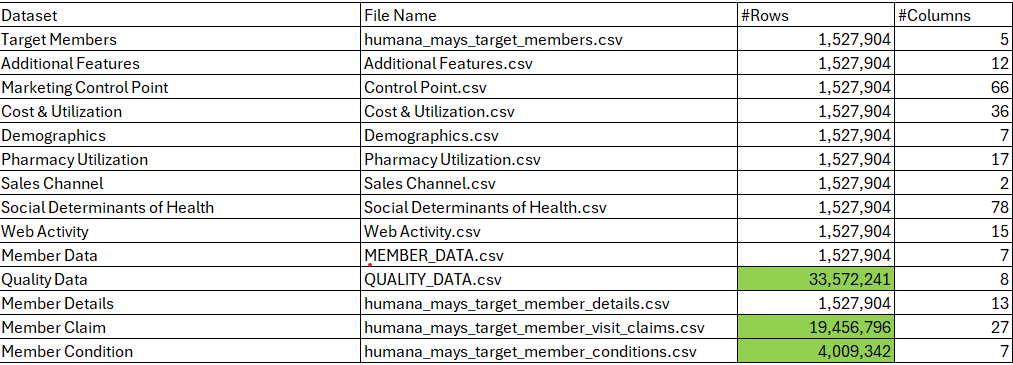

Total Number of unique id are 1527904. 3 datasets have to be brought in member level for aggregating the data effectively.

## 1. Member Visit Claims

In [6]:
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

# Read CSV File
df = spark.read.option("header",True).csv("humana_mays_target_member_visit_claims.csv",)
df.printSchema()

root
 |-- dos_year: string (nullable = true)
 |-- clm_unique_key: string (nullable = true)
 |-- serv_date_skey: string (nullable = true)
 |-- pcp_visit: string (nullable = true)
 |-- annual_wellness: string (nullable = true)
 |-- humana_paf: string (nullable = true)
 |-- preventative_visit: string (nullable = true)
 |-- comp_physical_exam: string (nullable = true)
 |-- ihwa: string (nullable = true)
 |-- fqhc_visit: string (nullable = true)
 |-- telehealth: string (nullable = true)
 |-- endocrinologist_visit: string (nullable = true)
 |-- oncolologist_visit: string (nullable = true)
 |-- radiologist_visit: string (nullable = true)
 |-- podiatrist_visit: string (nullable = true)
 |-- ophthalmologist_visit: string (nullable = true)
 |-- optometrist_visit: string (nullable = true)
 |-- physical_therapist_visit: string (nullable = true)
 |-- cardiologist_visit: string (nullable = true)
 |-- gastroenterologist_visit: string (nullable = true)
 |-- orthopedist_visit: string (nullable = true)


In [ ]:
df.show()

+--------+--------------+--------------+---------+---------------+----------+------------------+------------------+----+----------+----------+---------------------+------------------+-----------------+----------------+---------------------+-----------------+------------------------+------------------+------------------------+-----------------+-----------+-------------------+-------------------+-----------------+--------+-------+
|dos_year|clm_unique_key|serv_date_skey|pcp_visit|annual_wellness|humana_paf|preventative_visit|comp_physical_exam|ihwa|fqhc_visit|telehealth|endocrinologist_visit|oncolologist_visit|radiologist_visit|podiatrist_visit|ophthalmologist_visit|optometrist_visit|physical_therapist_visit|cardiologist_visit|gastroenterologist_visit|orthopedist_visit|obgyn_visit|nephroloogist_visit|pulmonologist_visit|urgent_care_visit|er_visit|     id|
+--------+--------------+--------------+---------+---------------+----------+------------------+------------------+----+----------+---

In [ ]:
df.dtypes

[('dos_year', 'string'),
 ('clm_unique_key', 'string'),
 ('serv_date_skey', 'string'),
 ('pcp_visit', 'string'),
 ('annual_wellness', 'string'),
 ('humana_paf', 'string'),
 ('preventative_visit', 'string'),
 ('comp_physical_exam', 'string'),
 ('ihwa', 'string'),
 ('fqhc_visit', 'string'),
 ('telehealth', 'string'),
 ('endocrinologist_visit', 'string'),
 ('oncolologist_visit', 'string'),
 ('radiologist_visit', 'string'),
 ('podiatrist_visit', 'string'),
 ('ophthalmologist_visit', 'string'),
 ('optometrist_visit', 'string'),
 ('physical_therapist_visit', 'string'),
 ('cardiologist_visit', 'string'),
 ('gastroenterologist_visit', 'string'),
 ('orthopedist_visit', 'string'),
 ('obgyn_visit', 'string'),
 ('nephroloogist_visit', 'string'),
 ('pulmonologist_visit', 'string'),
 ('urgent_care_visit', 'string'),
 ('er_visit', 'string'),
 ('id', 'string')]

In [ ]:
df.columns

['dos_year',
 'clm_unique_key',
 'serv_date_skey',
 'pcp_visit',
 'annual_wellness',
 'humana_paf',
 'preventative_visit',
 'comp_physical_exam',
 'ihwa',
 'fqhc_visit',
 'telehealth',
 'endocrinologist_visit',
 'oncolologist_visit',
 'radiologist_visit',
 'podiatrist_visit',
 'ophthalmologist_visit',
 'optometrist_visit',
 'physical_therapist_visit',
 'cardiologist_visit',
 'gastroenterologist_visit',
 'orthopedist_visit',
 'obgyn_visit',
 'nephroloogist_visit',
 'pulmonologist_visit',
 'urgent_care_visit',
 'er_visit',
 'id']

In [7]:
# PySpark DataFrame Type Conversion

#This code snippet demonstrates how to convert data types of columns in a PySpark DataFrame based on specific conditions.

from pyspark.sql.types import IntegerType, StringType, DoubleType, LongType, BooleanType
from pyspark.sql.functions import col

# Define new data types for columns
new_data_types={}

# Assign LongType to specific columns, BooleanType to all others
for i in df.columns:
  if i in ['dos_year','id','clm_unique_key','serv_date_skey']:
    new_data_types[i]=LongType()
  else:
    new_data_types[i]=BooleanType()

# Iterate through columns and apply cast
for column_name, new_type in new_data_types.items():
    df = df.withColumn(column_name, col(column_name).cast(new_type))

df.printSchema()

root
 |-- dos_year: long (nullable = true)
 |-- clm_unique_key: long (nullable = true)
 |-- serv_date_skey: long (nullable = true)
 |-- pcp_visit: boolean (nullable = true)
 |-- annual_wellness: boolean (nullable = true)
 |-- humana_paf: boolean (nullable = true)
 |-- preventative_visit: boolean (nullable = true)
 |-- comp_physical_exam: boolean (nullable = true)
 |-- ihwa: boolean (nullable = true)
 |-- fqhc_visit: boolean (nullable = true)
 |-- telehealth: boolean (nullable = true)
 |-- endocrinologist_visit: boolean (nullable = true)
 |-- oncolologist_visit: boolean (nullable = true)
 |-- radiologist_visit: boolean (nullable = true)
 |-- podiatrist_visit: boolean (nullable = true)
 |-- ophthalmologist_visit: boolean (nullable = true)
 |-- optometrist_visit: boolean (nullable = true)
 |-- physical_therapist_visit: boolean (nullable = true)
 |-- cardiologist_visit: boolean (nullable = true)
 |-- gastroenterologist_visit: boolean (nullable = true)
 |-- orthopedist_visit: boolean (nulla

In [ ]:
df.show()

+--------+--------------+--------------+---------+---------------+----------+------------------+------------------+----+----------+----------+---------------------+------------------+-----------------+----------------+---------------------+-----------------+------------------------+------------------+------------------------+-----------------+-----------+-------------------+-------------------+-----------------+--------+-------+
|dos_year|clm_unique_key|serv_date_skey|pcp_visit|annual_wellness|humana_paf|preventative_visit|comp_physical_exam|ihwa|fqhc_visit|telehealth|endocrinologist_visit|oncolologist_visit|radiologist_visit|podiatrist_visit|ophthalmologist_visit|optometrist_visit|physical_therapist_visit|cardiologist_visit|gastroenterologist_visit|orthopedist_visit|obgyn_visit|nephroloogist_visit|pulmonologist_visit|urgent_care_visit|er_visit|     id|
+--------+--------------+--------------+---------+---------------+----------+------------------+------------------+----+----------+---

**PySpark DataFrame Aggregation Configuration**

This code snippet prepares aggregation operations for a PySpark DataFrame by creating a dictionary that specifies different aggregation functions 
for different columns.

In [11]:
## Code Explanation

# Create list of columns excluding specific ones
cols = [x for x in df.columns if x not in ['id', 'dos_year', 'serv_date_skey']]

# Initialize aggregation dictionary
agg_dict = dict()

# Assign aggregation functions
for i in cols:
  if i == 'clm_unique_key':
    agg_dict[i] = 'count'  # Use count aggregation for clm_unique_key
  else:
    agg_dict[i] = 'sum'    # Use sum aggregation for all other columns

agg_dict  # Returns the aggregation dictionary

{'clm_unique_key': 'count',
 'pcp_visit': 'sum',
 'annual_wellness': 'sum',
 'humana_paf': 'sum',
 'preventative_visit': 'sum',
 'comp_physical_exam': 'sum',
 'ihwa': 'sum',
 'fqhc_visit': 'sum',
 'telehealth': 'sum',
 'endocrinologist_visit': 'sum',
 'oncolologist_visit': 'sum',
 'radiologist_visit': 'sum',
 'podiatrist_visit': 'sum',
 'ophthalmologist_visit': 'sum',
 'optometrist_visit': 'sum',
 'physical_therapist_visit': 'sum',
 'cardiologist_visit': 'sum',
 'gastroenterologist_visit': 'sum',
 'orthopedist_visit': 'sum',
 'obgyn_visit': 'sum',
 'nephroloogist_visit': 'sum',
 'pulmonologist_visit': 'sum',
 'urgent_care_visit': 'sum',
 'er_visit': 'sum'}

In [15]:
# Initialize an empty dictionary
dct = dict()

# Iterate through all columns in the DataFrame
for i in df.columns:
    # Skip 'id' and 'dos_year' columns
    if i not in ['id', 'dos_year']:
        # Special handling for 'clm_unique_key'
        if i == 'clm_unique_key':
            dct['count(' + i + ')'] = i  # Create count aggregation
        else:
            dct['sum(' + i + ')'] = i    # Create sum aggregation for other columns

# Resulting dictionary maps aggregation expressions to column names
dct

{'count(clm_unique_key)': 'clm_unique_key',
 'sum(serv_date_skey)': 'serv_date_skey',
 'sum(pcp_visit)': 'pcp_visit',
 'sum(annual_wellness)': 'annual_wellness',
 'sum(humana_paf)': 'humana_paf',
 'sum(preventative_visit)': 'preventative_visit',
 'sum(comp_physical_exam)': 'comp_physical_exam',
 'sum(ihwa)': 'ihwa',
 'sum(fqhc_visit)': 'fqhc_visit',
 'sum(telehealth)': 'telehealth',
 'sum(endocrinologist_visit)': 'endocrinologist_visit',
 'sum(oncolologist_visit)': 'oncolologist_visit',
 'sum(radiologist_visit)': 'radiologist_visit',
 'sum(podiatrist_visit)': 'podiatrist_visit',
 'sum(ophthalmologist_visit)': 'ophthalmologist_visit',
 'sum(optometrist_visit)': 'optometrist_visit',
 'sum(physical_therapist_visit)': 'physical_therapist_visit',
 'sum(cardiologist_visit)': 'cardiologist_visit',
 'sum(gastroenterologist_visit)': 'gastroenterologist_visit',
 'sum(orthopedist_visit)': 'orthopedist_visit',
 'sum(obgyn_visit)': 'obgyn_visit',
 'sum(nephroloogist_visit)': 'nephroloogist_visit',


In [19]:
# groupby id column and applying the aggregation operations defined in the dictionary and exporting to csv as 'claims_agg.csv'
df.groupby(['id']).agg(agg_dict).withColumnsRenamed(dct).fillna(0).toPandas().to_csv('/content/drive/MyDrive/humana_train.csv/claims_agg.csv', index=False)

In [ ]:
#reading the aggregated file and dropping unnecessary columns. Claims_agg consists of both 2021 and 2022 data
claims=pd.read_csv('claims.csv').drop('Unnamed: 0',axis=1)
claims.head()

,id,dos_year,sum(annual_wellness),count(clm_unique_key),sum(podiatrist_visit),sum(pcp_visit),sum(fqhc_visit),sum(cardiologist_visit),sum(telehealth),sum(urgent_care_visit),...,sum(orthopedist_visit),sum(ophthalmologist_visit),sum(humana_paf),sum(optometrist_visit),sum(endocrinologist_visit),sum(radiologist_visit),sum(physical_therapist_visit),sum(comp_physical_exam),sum(er_visit),sum(obgyn_visit)
0,663402,2021,0,44,0,0,0,17,0,0,...,0,0,0,2,2,14,0,0,5,0
1,1773501,2021,0,36,0,0,0,7,0,0,...,0,9,0,0,5,3,0,0,4,0
2,1438794,2021,0,28,0,0,0,15,0,0,...,0,0,0,0,0,4,0,0,0,1
3,261120,2022,0,19,2,0,0,0,0,5,...,0,0,0,0,0,3,0,0,2,4
4,599410,2021,0,5,0,0,0,2,0,0,...,1,2,0,0,0,0,0,0,0,0


In [ ]:
#creating a dictionary only for 2021 columns

dct_2021=dict()
for i in claims.columns:
  if i not in ['id','dos_year']:
    if i.startswith('sum'):
      dct_2021[i]='2021_'+ i.replace('sum(', '')[:-1]
    elif i.startswith('count'):
      dct_2021[i]='2021_'+ i.replace('count(', '')[:-1]
dct_2021

{'sum(annual_wellness)': '2021_annual_wellness',
 'count(clm_unique_key)': '2021_clm_unique_key',
 'sum(podiatrist_visit)': '2021_podiatrist_visit',
 'sum(pcp_visit)': '2021_pcp_visit',
 'sum(fqhc_visit)': '2021_fqhc_visit',
 'sum(cardiologist_visit)': '2021_cardiologist_visit',
 'sum(telehealth)': '2021_telehealth',
 'sum(urgent_care_visit)': '2021_urgent_care_visit',
 'sum(gastroenterologist_visit)': '2021_gastroenterologist_visit',
 'sum(oncolologist_visit)': '2021_oncolologist_visit',
 'sum(pulmonologist_visit)': '2021_pulmonologist_visit',
 'sum(preventative_visit)': '2021_preventative_visit',
 'sum(nephroloogist_visit)': '2021_nephroloogist_visit',
 'sum(orthopedist_visit)': '2021_orthopedist_visit',
 'sum(ophthalmologist_visit)': '2021_ophthalmologist_visit',
 'sum(humana_paf)': '2021_humana_paf',
 'sum(optometrist_visit)': '2021_optometrist_visit',
 'sum(endocrinologist_visit)': '2021_endocrinologist_visit',
 'sum(radiologist_visit)': '2021_radiologist_visit',
 'sum(physical_th

In [ ]:
#filtering the year only to 2021 and saving the csv file with new columns

claims[claims['dos_year']==2021].rename(columns=dct_2021).to_csv('claims_2021.csv')

In [ ]:
#creating a dictionary only for 2022 columns

dct_2022=dict()
for i in claims.columns:
  if i not in ['id','dos_year']:
    if i.startswith('sum'):
      dct_2022[i]='2022_'+ i.replace('sum(', '')[:-1]
    elif i.startswith('count'):
      dct_2022[i]='2022_'+ i.replace('count(', '')[:-1]
dct_2022

{'sum(annual_wellness)': '2022_annual_wellness',
 'count(clm_unique_key)': '2022_clm_unique_key',
 'sum(podiatrist_visit)': '2022_podiatrist_visit',
 'sum(pcp_visit)': '2022_pcp_visit',
 'sum(fqhc_visit)': '2022_fqhc_visit',
 'sum(cardiologist_visit)': '2022_cardiologist_visit',
 'sum(telehealth)': '2022_telehealth',
 'sum(urgent_care_visit)': '2022_urgent_care_visit',
 'sum(gastroenterologist_visit)': '2022_gastroenterologist_visit',
 'sum(oncolologist_visit)': '2022_oncolologist_visit',
 'sum(pulmonologist_visit)': '2022_pulmonologist_visit',
 'sum(preventative_visit)': '2022_preventative_visit',
 'sum(nephroloogist_visit)': '2022_nephroloogist_visit',
 'sum(orthopedist_visit)': '2022_orthopedist_visit',
 'sum(ophthalmologist_visit)': '2022_ophthalmologist_visit',
 'sum(humana_paf)': '2022_humana_paf',
 'sum(optometrist_visit)': '2022_optometrist_visit',
 'sum(endocrinologist_visit)': '2022_endocrinologist_visit',
 'sum(radiologist_visit)': '2022_radiologist_visit',
 'sum(physical_th

In [ ]:
#filtering the year only to 2022 and saving the csv file with new columns

claims[claims['dos_year']==2022].rename(columns=dct_2022).to_csv('claims_2022.csv')

In [ ]:
from google.colab import files
files.download('claims_2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('claims_2022.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

## 2. Quality Data 
Code outputs are present in Humana_sheet 1

In [ ]:
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

# Read CSV File
quality = spark.read.option("header",True).csv("QUALITY_DATA.csv")
quality.printSchema()

In [ ]:
from pyspark.sql.types import IntegerType, StringType, DoubleType, LongType, BooleanType
from pyspark.sql.functions import col

#Casting count columns to integer type
quality = quality.withColumn('eligible_cnt', col('eligible_cnt').cast(IntegerType()))
quality = quality.withColumn('compliant_cnt', col('compliant_cnt').cast(IntegerType()))

In [ ]:
#dropping duplicates 

quality.dropDuplicates( subset=['measurement_year','measure_name', 'measure_type','base_event_date','compliant_cnt','eligible_cnt',	'id'])

In [ ]:
from pyspark.sql import functions as F

#pivoting the measure_names and taking sum of eligible count

quality_agg_elig_mn=quality.groupby(['id']).pivot('measure_name').agg({'eligible_cnt':'sum'})
        #agg(F.first('measurement_year').alias('measurement_year'),F.first('eligible_cnt').alias('eligible_cnt')))

In [ ]:
dct_elig_mn =dict()
for i in quality_agg_elig_mn.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct_elig_mn[i]= i.replace(' ', '_')+'_elig_cnt'
    
dct_elig_mn

In [ ]:
#Saving the aggregated eligible count wrt measure name file to csv

quality_agg_elig_mn.toPandas().rename(columns=dct_elig_mn).to_csv('QUALITY_DATA_measure_name_elig_cnt_pyspark.csv')

In [ ]:
#pivoting the measure_names and taking sum of compliant count

quality_agg_comp_mn =quality.groupby(['id']).pivot('measure_name').agg({'compliant_cnt':'sum'})

In [ ]:
dct_comp_mn=dict()
for i in quality_agg_comp_mn.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct_comp_mn[i]= i.replace(' ', '_')+'_comp_cnt'
    
dct_comp_mn

In [ ]:
#Saving the aggregated compliant count wrt measure name file to csv

quality_agg_comp_mn.toPandas().rename(columns=dct_comp_mn).to_csv('QUALITY_DATA_measure_name_comp_cnt_pyspark.csv')

In [ ]:
#pivoting the measure_types and taking sum of compliant count

quality_agg_comp_mt=quality.groupby(['id']).pivot('measure_type').agg({'compliant_cnt':'sum'})

In [ ]:
dct_comp_mt=dict()
for i in quality_agg_comp_mt.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct_comp_mt[i]= i.replace(' ', '_')+'_comp_cnt'
    
dct_comp_mt

In [ ]:
#Saving the aggregated compliant count wrt measure type file to csv

quality_agg_comp_mt.toPandas().rename(columns=dct_comp_mt).to_csv('QUALITY_DATA_measure_type_comp_cnt_pyspark.csv')

In [ ]:
#pivoting the measure_types and taking sum of eligible count

quality_agg_elig_mt=quality.groupby(['id']).pivot('measure_type').agg({'eligible_cnt':'sum'})

In [ ]:
dct_elig_mt=dict()
for i in quality_agg_elig_mt.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct_elig_mt[i]= i.replace(' ', '_')+'_elig_cnt'
    
dct_elig_mt

In [ ]:
#Saving the aggregated compliant count wrt measure type file to csv

quality_agg_elig_mt.toPandas().rename(columns=dct_elig_mt).to_csv('QUALITY_DATA_measure_type_elig_cnt_pyspark.csv')

In [ ]:
#with both eligible and compliant counts wrt measure type

df_agg2=quality.groupby(['id']).pivot('measure_type').agg({'eligible_cnt':'sum','compliant_cnt':'sum'})

In [ ]:
#quality dataset wrt measure name and measurement year for compliant count

quality.pivot_table(index = 'id', columns =['measure_name','measurement_year'], values = 'compliant_cnt' , aggfunc='sum', fill_value = 0).to_csv('QUALITY_DATA__measure_nm_comp_cnt.csv')

quality.pivot_table(index = 'id', columns =['measure_type','measurement_year'], values = 'compliant_cnt' , aggfunc='sum', fill_value = 0).to_csv('QUALITY_DATA__measure_type_comp_cnt.csv')


In [ ]:
#df['base_event_dt_lag'] = df.sort_values(by=['id','base_event_date']).groupby('id')['base_event_date'].shift(periods=1)
# Convert the base_event_date to a proper datetime format
# df['base_event_date'] = pd.to_datetime(df['base_event_date'], format='%d%b%Y', errors='coerce')

# df['base_event_dt_lag'] = df.sort_values(by=['id', 'base_event_date']).groupby('id').apply(lambda x: x['base_event_date'].shift(1))

---

## 3.Member Conditions

Code outputs are present in Humana_sheet 1

In [ ]:
mc=pd.read_csv('humana_mays_target_member_conditions.csv', low_memory = False)

In [ ]:
#This code creates a new column 'condition' by extracting and reformatting the first value from a comma-separated string in the 'cond_desc' column.

mc['condition']=mc.apply(lambda x: x['cond_desc'].split(',', 1)[0].replace(' ','_'), axis=1)

In [ ]:
mc[mc['cond_key'].between(326,329)][['cond_key','cond_desc']].drop_duplicates()
mc[mc['cond_key'].between(136,138)][['cond_key','cond_desc']].drop_duplicates()

In [1]:
aggregated_categories = {
    "Cardiovascular_Diseases": ['Heart_Failure', 'Acute_on_Chronic_Heart_Failure', 'Congestive_Heart_Failure', 
                                'Specified_Heart_Arrhythmias', 'Angina_Pectoris', 'Cardiomyopathy/Myocarditis', 
                                'End-Stage_Heart_Failure'],
    
    "Diabetes_Related": ['Diabetes_with_Chronic_Complications', 'Diabetes_without_Complication', 
                         'Diabetes_with_Glycemic', 'Proliferative_Diabetic_Retinopathy_and_Vitreous_Hemorrhage', 
                         'Diabetes_with_Severe_Acute_Complications', 'Severe_Diabetic_Eye_Disease'],
    
    "Kidney_and_Liver_Diseases": ['Chronic_Kidney_Disease', 'Dialysis_Status', 'Chronic_Liver_Failure/End-Stage_Liver_Disorders', 
                                  'Cirrhosis_of_Liver', 'Chronic_Hepatitis'],
    
    "Respiratory_Diseases": ['Chronic_Obstructive_Pulmonary_Disease', 'Severe_Persistent_Asthma', 
                              'Fibrosis_of_Lung_and_Other_Chronic_Lung_Disorders', 'Idiopathic_Pulmonary_Fibrosis_and_Lung_Involvement_in_Systemic_Sclerosis'],
    
    "Cancers": ['Lung_and_Other_Severe_Cancers', 'Lymphoma_and_Other_Cancers', 'Breast', 'Prostate', 
                'Colorectal', 'Cancer_Metastatic_to_Bone', 'Cancer_Metastatic_to_Lung', 'Metastatic_Cancer_and_Acute_Leukemia'],
    
    "Mental_Health_Disorders": ['Major_Depressive', 'Bipolar_Disorders_without_Psychosis', 'Schizophrenia', 
                                'Reactive_and_Unspecified_Psychosis', 'Personality_Disorders', 
                                'Substance_Use_Disorder', 'Drug_Use_Disorder', 'Alcohol_Use_Disorder'],
    
    "Neurological_Disorders": ['Parkinson_and_Other_Degenerative_Disease_of_Basal_Ganglia', 'Seizure_Disorders_and_Convulsions', 
                               'Multiple_Sclerosis', 'Cerebral_Palsy', 'Quadriplegic_Cerebral_Palsy'],
    
    "Immunological_Disorders": ['Disorders_of_Immunity', 'Systemic_Lupus_Erythematosus_and_Other_Specified_Systemic_Connective_Tissue_Disorders', 
                                'Chronic_Inflammatory_Demyelinating_Polyneuritis_and_Multifocal_Motor_Neuropathy', 
                                'Rheumatoid_Arthritis_and_Other_Specified_Inflammatory_Rheumatic_Disorders', 
                                'Rheumatoid_Arthritis_and_Inflammatory_Connective_Tissue_Disease', 'Specified_Immunodeficiencies_and_White_Blood_Cell_Disorders'],
    
    "Miscellaneous": ['Morbid_Obesity', 'Amputation_Status', 'Chronic_Ulcer_of_Skin', 'Artificial_Openings_for_Feeding_or_Elimination', 
                      'Pressure_Ulcer_of_Skin_with_Partial_Thickness_Skin_Loss']
}


In [ ]:
#defining a new function

def agg_condition(x,aggregated_categories=aggregated_categories):
    for k , v in aggregated_categories.items():
        if x in v:
            return k
    return 'other'
    

In [ ]:
#applying the newly defined function in this

mc['condition_agg'] = mc['condition'].apply(agg_condition)

In [ ]:
#pivoting the newly created 'condition_agg' columns and using count as aggregation function.

mc.pivot_table(index='id',columns='condition_agg',  values='membership_year',aggfunc='count').fillna(0)

In [ ]:
mc.pivot_table(index='id',columns='condition_agg',  values='membership_year',aggfunc='count').fillna(0).to_csv(r'C:\Users\shanm\OneDrive\Desktop\Kavya\Humana_Mays_24\Data\Training_final\Training_final\member_conditions_agg.csv')